In [1]:
from hossam import load_data
from scipy.stats import t
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('height')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('데이터 타입 정보 :')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata
데이터셋 크기 : (36, 3)
행 개수 : 36개
열 개수 : 3개
데이터 타입 정보 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학년      36 non-null     int64 
 1   성별      36 non-null     object
 2   키       36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 996.0+ bytes
None


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169


In [4]:
clevel=0.95
data=origin['키']

In [6]:
n=len(data)
n

36

In [7]:
dof=n-1
dof

35

In [8]:
sample_mean=data.mean()
sample_mean

np.float64(167.83333333333334)

In [9]:
sample_std=data.std()
sample_std

np.float64(7.315345905306578)

In [10]:
sample_std_error=sample_std/sqrt(n)
sample_std_error

np.float64(1.2192243175510964)

In [11]:
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(np.float64(165.35817637995726), np.float64(170.30849028670943))

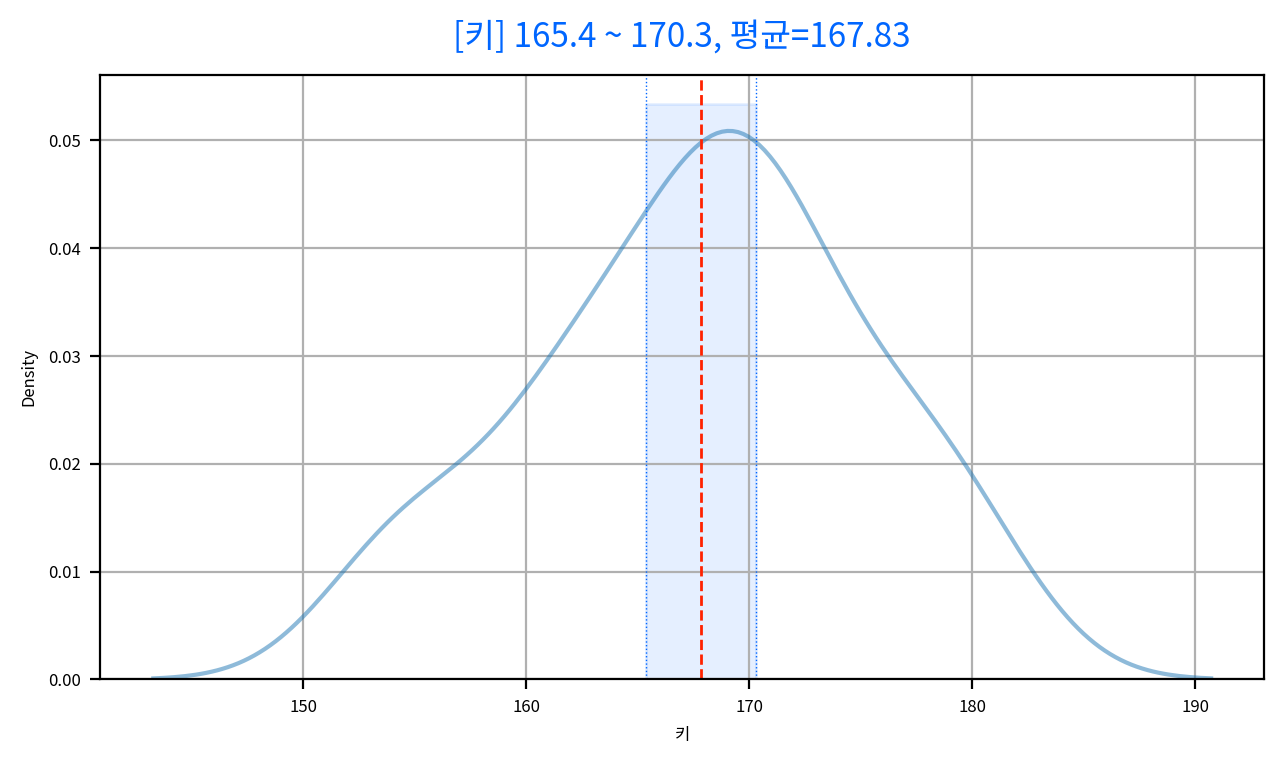

In [14]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.kdeplot(data=data, fill=False, alpha=0.5)

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax=ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', color='#ff2200', linewidth=1)

# 3. 그래프 꾸미기
ax.grid(True)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)
# ax.set_xlim([⭐,⭐])      # x축 범위
# ax.set_ylim([⭐,⭐])   # y축 범위
# ax.set_xticks([1,2,3,4], ['1학년','2학년','3학년','4학년'])
# ax.set_yticks(range(70,101,3),range(70,101,3))

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()